# NN Prediction of Telco Client Churn

In [1]:
import sys
sys.path.append("..")
import numpy as np
import pandas as pd
from multilayer_perceptron import MultiLayerNN
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# Data Prep

In [2]:
X_train = np.loadtxt("data-churn/x_train.csv")
y_train = np.loadtxt("data-churn/y_train.csv")
X_test = np.loadtxt("data-churn/x_test.csv")
y_test = np.loadtxt("data-churn/y_test.csv")

## Normalization

In [3]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [4]:
norm_X_train = scaler.transform(X_train)
norm_X_test = scaler.transform(X_test)

## Reshaping

In [5]:
norm_X_train = norm_X_train.T
y_train = y_train.reshape(1, y_train.shape[0])
norm_X_test = norm_X_test.T
y_test = y_test.reshape(1, y_test.shape[0])

In [6]:
print(norm_X_train.shape)
print(y_train.shape)
print(norm_X_test.shape)
print(y_test.shape)

(39, 4930)
(1, 4930)
(39, 2113)
(1, 2113)


# Binary Neural Network

In [7]:
churn_nn = MultiLayerNN(norm_X_train, y_train)

Cost after epoch 0: 0.687152
Learning rate after epoch 0: 0.010000
Cost after epoch 1000: 0.395289
Learning rate after epoch 1000: 0.009513
Cost after epoch 2000: 0.376943
Learning rate after epoch 2000: 0.008188
Cost after epoch 3000: 0.365583
Learning rate after epoch 3000: 0.006378
Cost after epoch 4000: 0.358790
Learning rate after epoch 4000: 0.004495


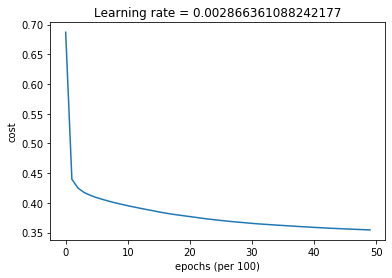

In [8]:
churn_nn.fit_binary(layer_dimensions = [39, 20, 10, 5, 1],
                    optimizer = "gd",
                    learning_rate = 0.01,
                    learning_decay_rate = 1e-7,
                    minibatched = True,
                    minibatch_size = 512,
                    num_epochs = 5000)

In [9]:
# churn_nn.L_layer_model(layer_dimensions = [39, 30, 25, 20, 10, 5, 1],
#                        print_cost = False,
#                        num_iterations = 7500,
#                        learning_rate = 0.0125)

## Training Performance

In [10]:
pred_train = churn_nn.predict_binary(norm_X_train, y_train)

Accuracy: 0.8336713995943205


In [11]:
print("Precision:", precision_score(y_train[0], pred_train[0]))
print("Recall:", recall_score(y_train[0], pred_train[0]))

Precision: 0.7137713771377138
Recall: 0.6123552123552124


In [12]:
tn, fp, fn, tp = confusion_matrix(y_train[0], pred_train[0], normalize = "all").ravel()
pd.DataFrame([[tn, fp], [fn, tp]], index = ["label: 0", "label: 1"], columns = ["predicted: 0", "predicted: 1"])

,predicted: 0,predicted: 1
label: 0,0.672819,0.064503
label: 1,0.101826,0.160852


## Test Performance

In [13]:
pred_test = churn_nn.predict_binary(norm_X_test, y_test)

Accuracy: 0.792238523426408


In [14]:
print("Precision:", precision_score(y_test[0], pred_test[0]))
print("Recall:", recall_score(y_test[0], pred_test[0]))

Precision: 0.6470588235294118
Recall: 0.5174216027874564


In [15]:
tn, fp, fn, tp = confusion_matrix(y_test[0], pred_test[0], normalize = "all").ravel()
pd.DataFrame([[tn, fp], [fn, tp]], index = ["label: 0", "label: 1"], columns = ["predicted: 0", "predicted: 1"])

,predicted: 0,predicted: 1
label: 0,0.651680,0.076668
label: 1,0.131093,0.140558


In [16]:
# pred_train = np.where(A4 > 0.5, 1, 0)
# accuracy_score(cat_y_train[0], pred_train[0])